In [1]:
!pip install matplotlib
!pip install bioinfokit
!pip install yellowbrick
!pip install statsmodels

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [3]:
sns.set_palette("pastel")

In [4]:
import requests

url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
response = requests.get(url)

with open('mcdonalds.csv', 'wb') as f:
    f.write(response.content)

df = pd.read_csv('mcdonalds.csv')
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [5]:
# finding the shape
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
print(pd.isnull(df).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
df['Age'].unique()

array([61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 28, 65, 54, 67, 34, 31,
       47, 37, 41, 36, 50, 39, 35, 20, 24, 44, 40, 48, 38, 57, 60, 66, 42,
       26, 52, 29, 25, 22, 45, 18, 68, 43, 21, 27, 33, 63, 46, 59, 19, 64,
       70, 30, 71], dtype=int64)

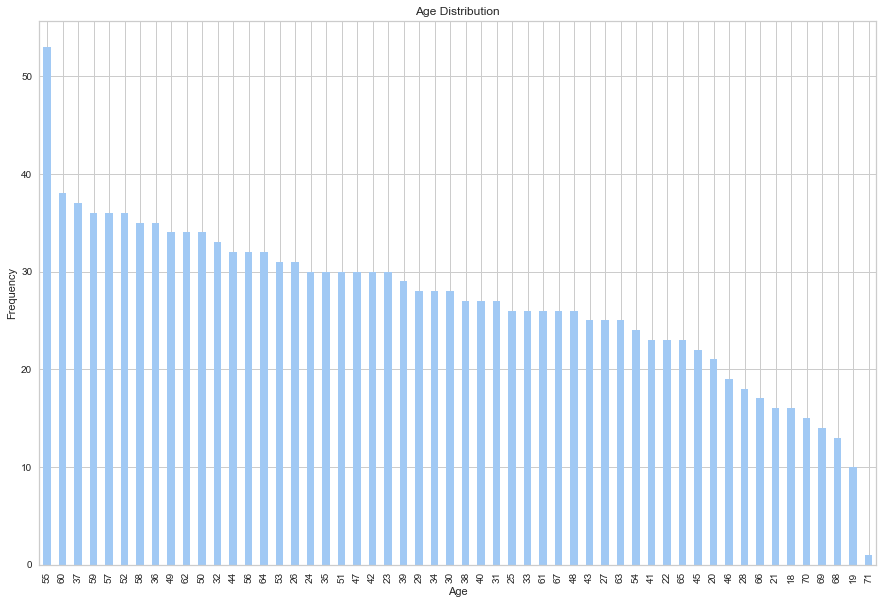

In [10]:
plt.figure(figsize=(15,10)) #increase the size of the figure
age_counts = df['Age'].value_counts()
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [11]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

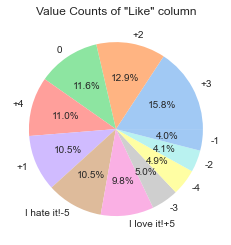

In [12]:
#check value counts of "like"

data = df['Like'].value_counts()

plt.pie(data, labels=data.index,autopct='%1.1f%%')
plt.title('Value Counts of "Like" column')
plt.show()

In [13]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

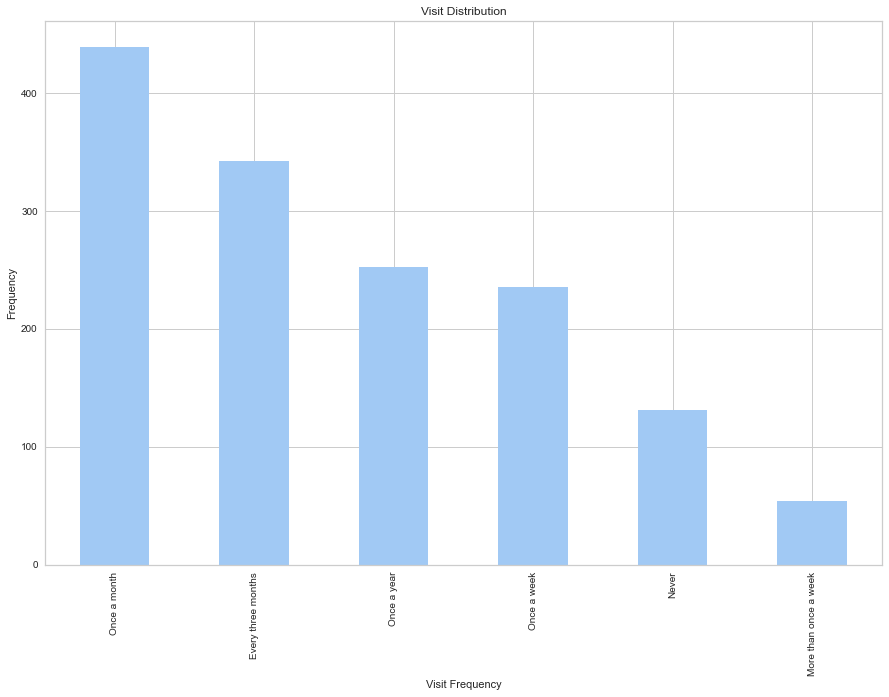

In [14]:
#check value counts of "VisitFrequency"

plt.figure(figsize=(15,10)) #increase the size of the figure
age_counts = df['VisitFrequency'].value_counts()
age_counts.plot(kind='bar')
plt.xlabel('Visit Frequency')
plt.ylabel('Frequency')
plt.title('Visit Distribution')
plt.show()

In [15]:
#check getting the value counts of 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

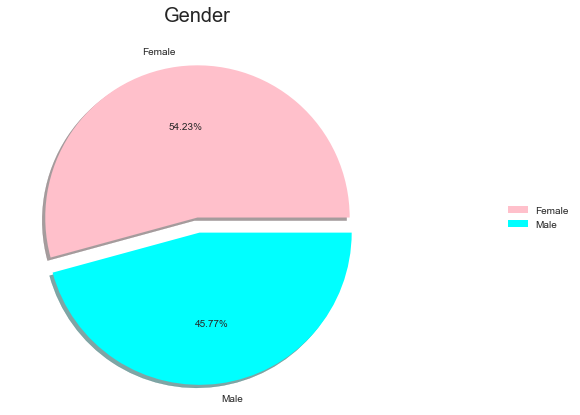

In [16]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
ax.set_title('Gender', fontsize = 20)
ax.axis('off')
ax.legend(labels, loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

     Age
Age  1.0


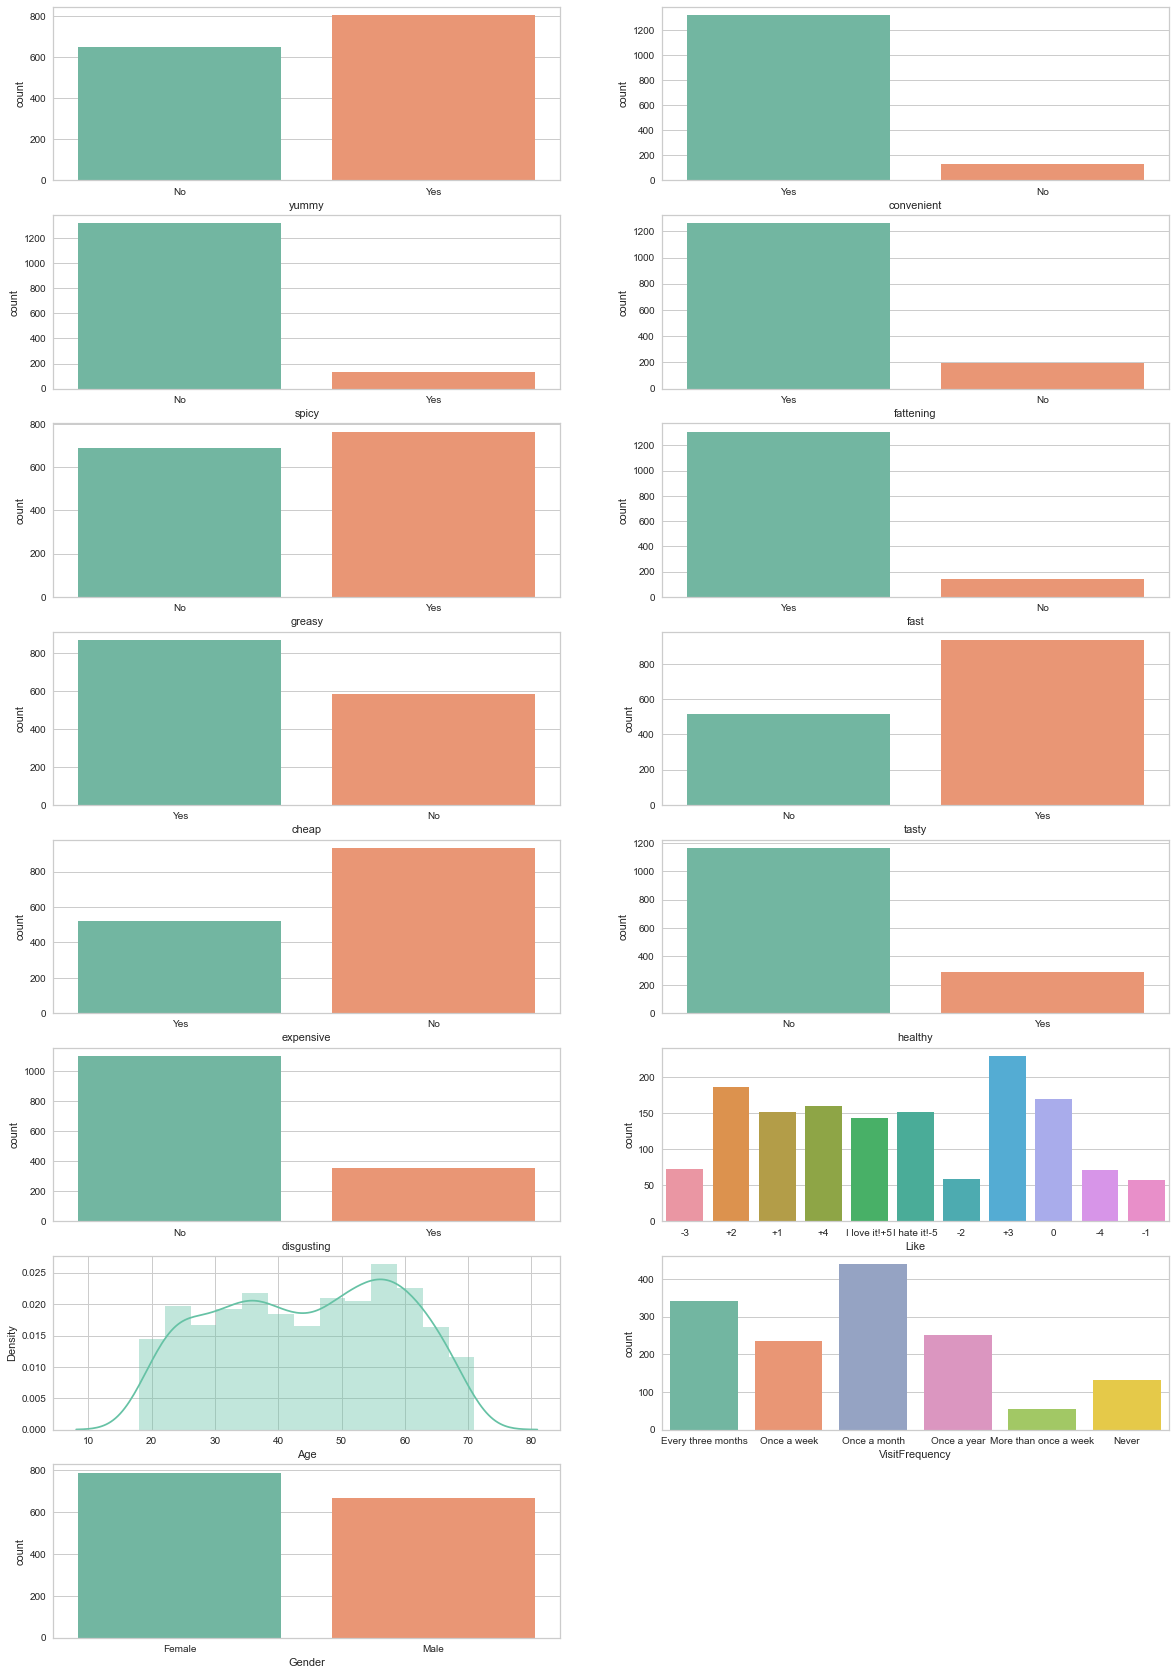

In [17]:
from warnings import filterwarnings

# Suppress warnings
filterwarnings("ignore")

sns.set_palette("Set2")

# Initialize lists to store categorical and continuous variables
cat = []
con = []

# Calculate number of rows needed for subplots
num_rows = int((df.shape[1]+1)/2)

# Set figure size for better visualization
plt.figure(figsize=(20, 30))

# Initialize counter for subplot
x = 1

# Loop through columns in the dataframe
for i in df.columns:
    if df[i].dtypes == "object":
        # Append to categorical variable list
        cat.append(i)
        # Plot countplot for categorical variable
        plt.subplot(num_rows, 2, x)
        x = x + 1
        sns.countplot(df[i])
    else:
        # Append to continuous variable list
        con.append(i)
        # Plot histogram for continuous variable
        plt.subplot(num_rows, 2, x)
        x = x + 1
        sns.distplot(df[i])

# Print correlation matrix
print(df.corr())

# Show the plot
plt.show()

### Demographic segmentation using 'Age' & 'Gender'

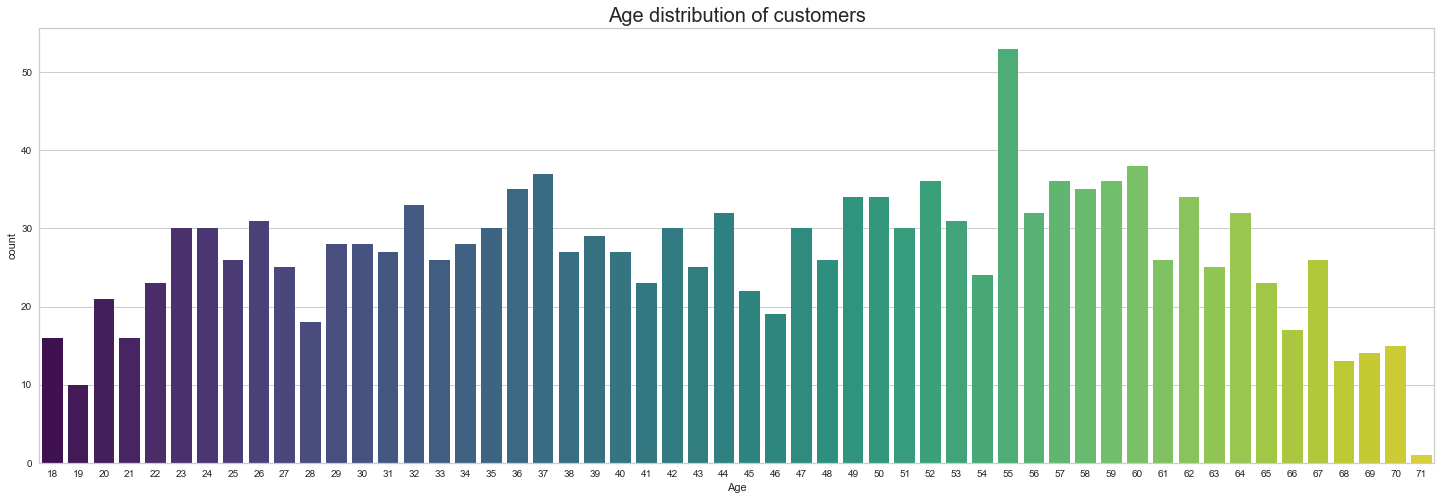

In [18]:
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(x=df['Age'], palette = 'viridis', ax=ax)
ax.set_title('Age distribution of customers', fontsize = 20)

plt.show()

## Barplot for Likelyness of McDonald w.r.t Age

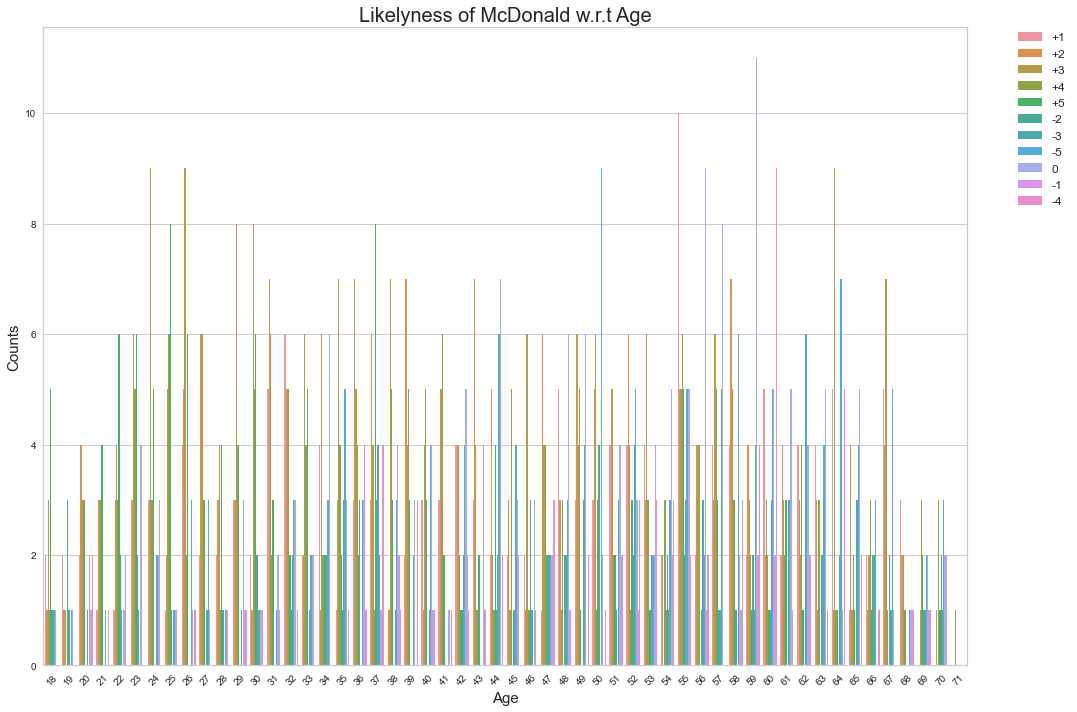

In [19]:
# renaming the category for convenience 
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

grouped_df = df.groupby(["Age", "Like"]).size().reset_index(name='Counts')

# plotting the results
plt.figure(figsize=(15,10))
sns.barplot(x="Age", y="Counts", hue="Like", data=grouped_df)
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.show()

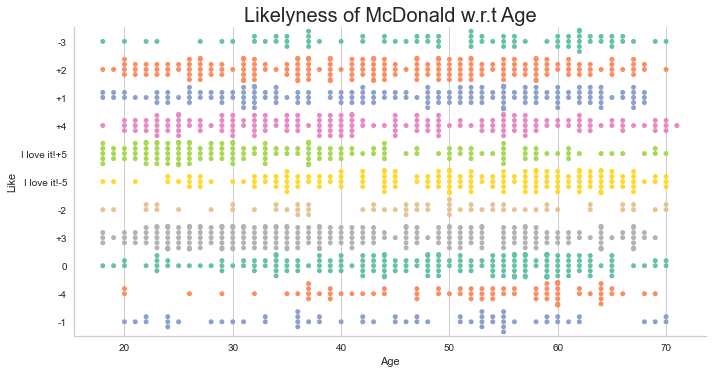

In [20]:
# Pyschographic segmentation using 'Like'

# renaming the category for convenience 
df['Like'] = df['Like'].replace({'-5': 'I love it!-5', '+5':'I love it!+5'})

# plotting the results
sns.catplot(data=df, x="Age", y="Like", orient="h", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

### Violinplot for Likelyness of McDonald w.r.t Age

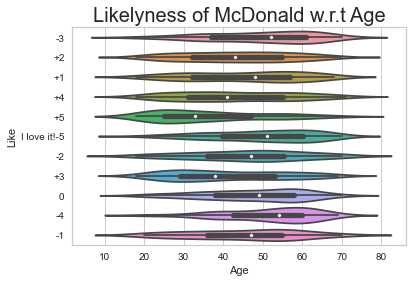

In [21]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.violinplot(x="Age", y="Like", data=df)
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

In [22]:
# First, we will drop the columns 'Like', 'Age', 'VisitFrequency', and 'Gender' as they are not binary features
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

# Let's take a look at the head of our modified dataframe
df_new.head()

# To perform label encoding, we will use the `LabelEncoder` from `scikit-learn` library
# This function will map 'Yes' to 1 and 'No' to 0 for each column
df_encoded = df_new.apply(LabelEncoder().fit_transform)

# Let's take a look at the head of our encoded dataframe
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


## Scaling the data and applying PCA

In [23]:
# Scaling the data helps to standardize the range of independent variables.
# PCA (Principal Component Analysis) is a technique used to reduce the dimensionality of a large dataset by creating new variables (components) from the existing variables that captures most of the variance in the data.
# Standardizing the data
pca_data = preprocessing.scale(df_encoded)

# Creating an instance of PCA with 11 components
pca = PCA(n_components=11)

# Fitting the data to the PCA model and transforming it to 11-dimensional space
pc = pca.fit_transform(pca_data)

# Assigning names to the components
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']

# Creating a dataframe with the transformed components
pf = pd.DataFrame(data = pc, columns = names)

# Showing the first 5 records of the dataframe
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [24]:
# variance (from pc1 to pc11)
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

### Fit PCA model to the data

In [25]:
# Fit PCA model to the data
pca = PCA(n_components=11)
pca.fit(df_encoded)

# Define the number of principal components
num_pc = pca.n_features_

# Create a list of PC labels
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

# Calculate the loadings, which are the correlation coefficients between the original variables and the components
loadings = pca.components_

# Create a DataFrame from the loadings, with PC labels as column names
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

# Add feature names as an index
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')

# Display the loadings
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


### Plotting the correlation matrix of the loadings of the PCA components

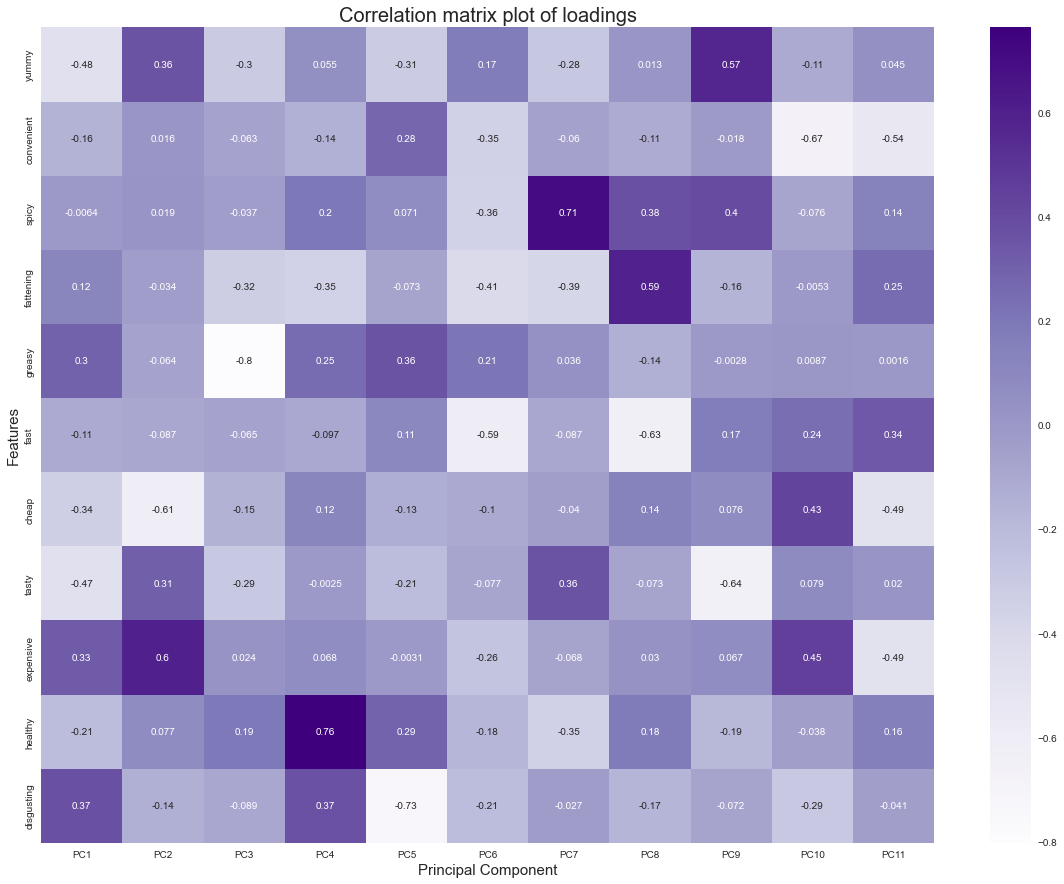

In [26]:
# to visualize the relationship between the original variables and the components
plt.rcParams['figure.figsize'] = (20,15) # setting the figure size

# generating the heatmap using the seaborn library
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')

# setting the title for the plot
plt.title('Correlation matrix plot of loadings', fontsize=20)

# setting the axis labels
ax.set_xlabel('Principal Component', fontsize=15)
ax.set_ylabel('Features', fontsize=15)

# showing the plot
plt.show()

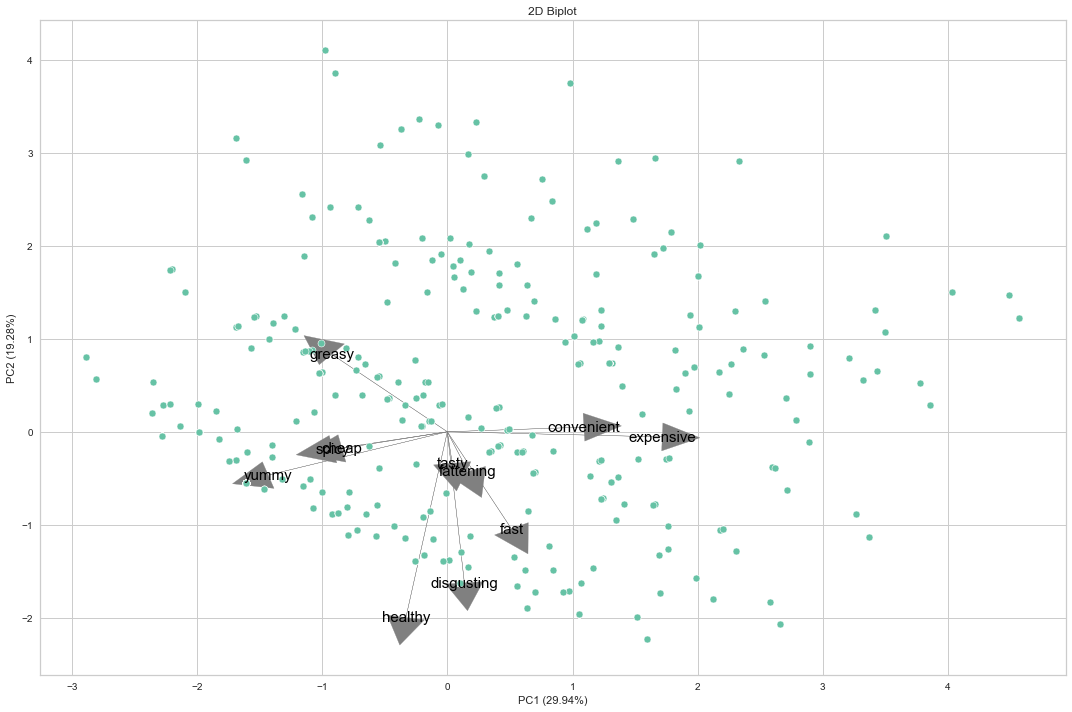

In [27]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
plt.rcParams['figure.figsize'] = (15,10)
for i, feature in enumerate(df.columns.values[:11]):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, head_width=0.3, head_length=0.3, fc='gray', ec='gray')
    plt.text(loadings[i, 0]*3, loadings[i, 1]*3, feature, color='black', ha='center', va='center', fontsize=15)
    
sns.scatterplot(pca_scores[:, 0], pca_scores[:, 1], palette='pastel')
plt.xlabel("PC1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("PC2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("2D Biplot")
plt.tight_layout()
plt.show()

## Applying the Elbow Method

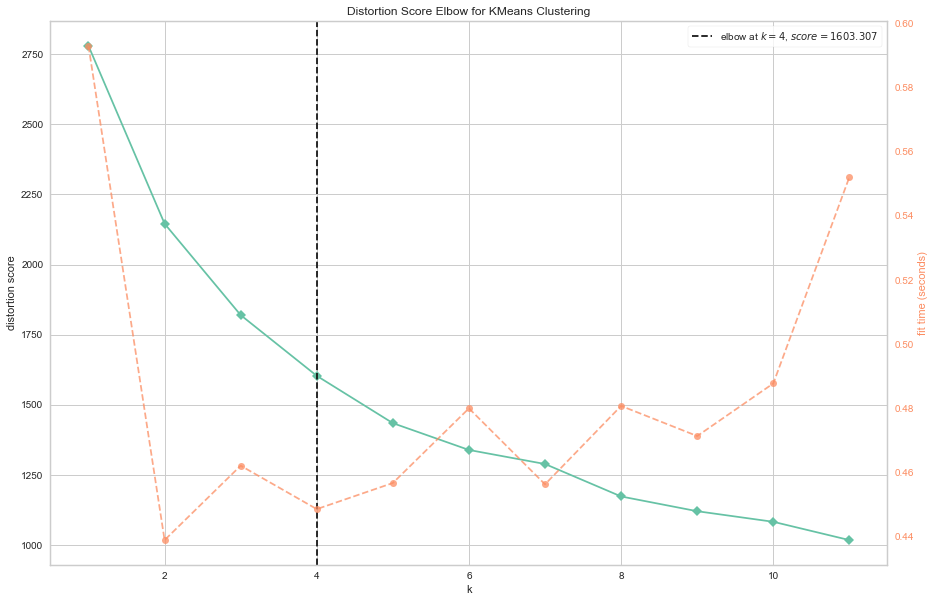

In [28]:
# Applying the Elbow Method

# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), size=(1080, 720)).fit(df_encoded)
visualizer.show();

## Applying the K-Means Clustering Algorithm

In [29]:
# Defining the number of clusters
n_clusters = 4

# Instantiating the k-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)

# Fitting the k-means model on the encoded dataset
kmeans.fit(df_encoded)

# Adding the cluster labels to the original dataframe
df['cluster_num'] = kmeans.labels_

# Printing the cluster labels for each data point
print("Labels:", kmeans.labels_)

# Printing the within-cluster sum of squares (WCSS)
print("WCSS:", kmeans.inertia_)

# Printing the number of iterations that k-means algorithm ran to reach minimum WCSS
print("No. of iterations:", kmeans.n_iter_)

# Printing the location of centroids for each cluster
print("Cluster centroids:", kmeans.cluster_centers_)

# Printing the size of each cluster
print("Cluster size:", Counter(kmeans.labels_))

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558945
No. of iterations: 8
Cluster centroids: [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size: Counter({1: 580, 0: 323, 2: 304, 3: 246})


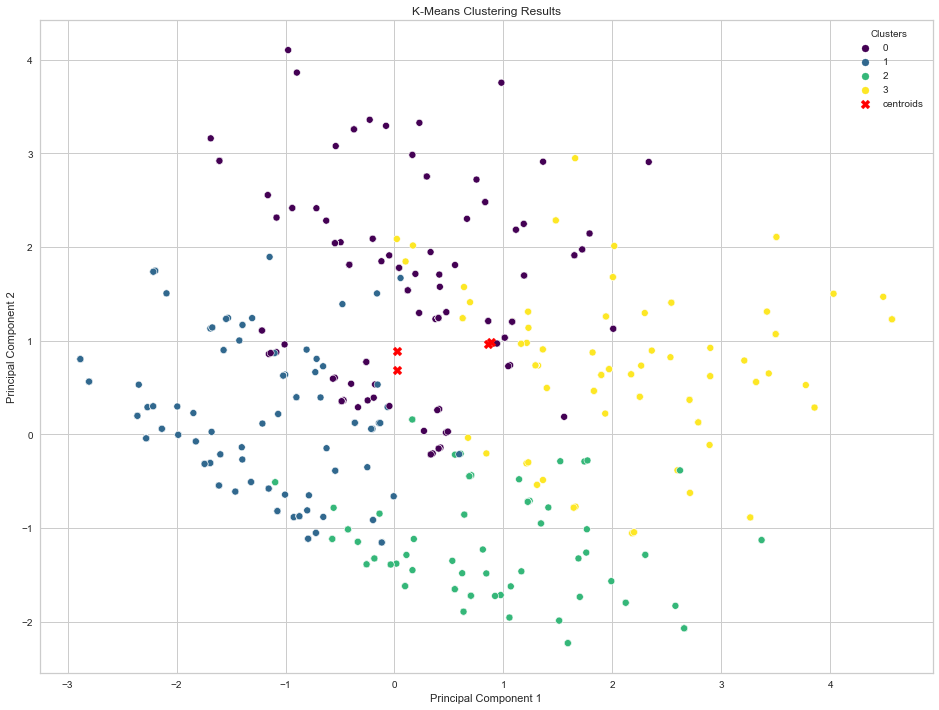

In [30]:
# Set plot style
sns.set_style("whitegrid")

# Plotting the scatter plot of principal components with different clusters
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_, palette='viridis', ax=ax)

# Adding centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="red", s=80, label="centroids")

# Adding legend and labels to the plot
plt.legend(title='Clusters', loc='upper right')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Results")

# Showing the plot
plt.show()

## Description of Segments using Crosstab and Mosaic Plot

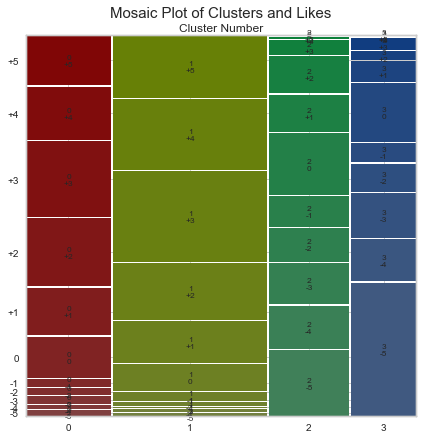

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


None

In [31]:
df['Like'] = df['Like'].replace({'I love it!-5': '-5','I love it!+5':'+5'})

# Crosstab of Cluster Numbers and Likes
crosstab = pd.crosstab(df['cluster_num'], df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

# Mosaic Plot of Crosstab
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.title("Mosaic Plot of Clusters and Likes", fontsize=15)
plt.xlabel("Cluster Number", fontsize=12)
plt.ylabel("Like Score", fontsize=12)
plt.show()
display(crosstab, plt.show())

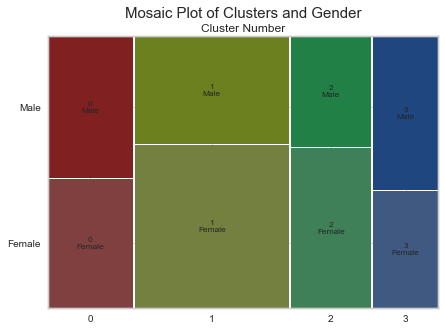

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


None

In [32]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.title("Mosaic Plot of Clusters and Gender", fontsize=15)
plt.xlabel("Cluster Number", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.show()
display(crosstab_gender, plt.show())

### Box plot of Age by Cluster

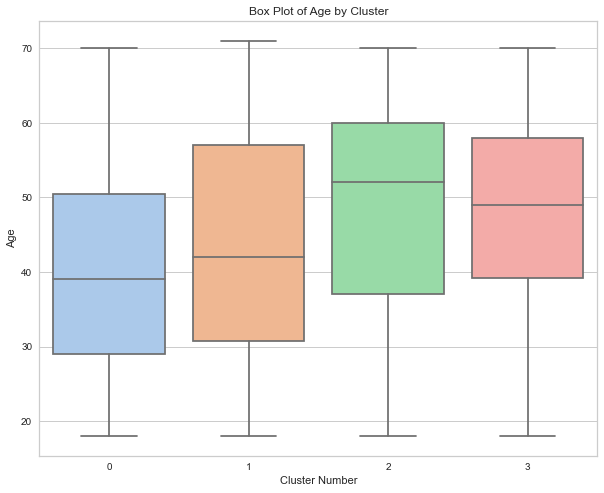

In [33]:
# Box plot of Age by Cluster
plt.figure(figsize=(10, 8))
sns.boxplot(x="cluster_num", y="Age", palette = 'pastel',data=df)
plt.title("Box Plot of Age by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Age")
plt.show()

### Visualizing Target Segment using Visit Frequency

   cluster_num  VisitFrequency
0            0        2.547988
1            1        2.584483
2            2        2.822368
3            3        2.654472


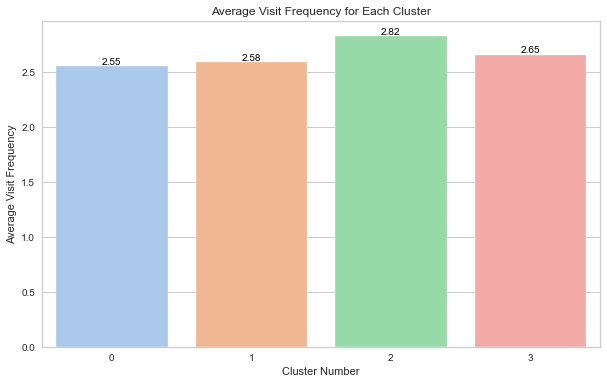

In [34]:
# Encoding Visit Frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Grouping by Cluster Number and calculating the mean of Visit Frequency
visit = df.groupby('cluster_num')['VisitFrequency'].mean()

# Converting the result to a DataFrame and resetting the index
visit = visit.to_frame().reset_index()
print(visit)

# Plotting the bar plot of average Visit Frequency for each Cluster
plt.figure(figsize=(10,6))
sns.barplot(x='cluster_num', y='VisitFrequency',palette = 'pastel', data=visit)
plt.title("Average Visit Frequency for Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Average Visit Frequency")

# Adding the value over each bar
for i, v in enumerate(visit['VisitFrequency'].iteritems()):
    plt.text(i, v[1], str(round(v[1], 2)), color='black', ha='center', va='bottom')

plt.show()

### Visualizing Target Segment using 'Like'

   cluster_num      Like
0            0  3.275542
1            1  2.962069
2            2  6.171053
3            3  7.422764


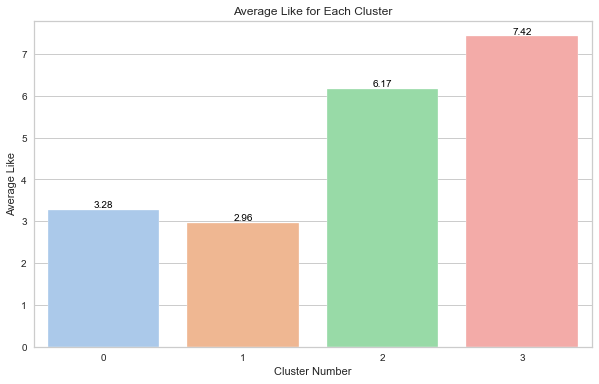

In [35]:
# Encoding like
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
df['Like'] = LabelEncoder().fit_transform(df['Like'])

# Grouping by Cluster Number and calculating the mean of like
like = df.groupby('cluster_num')['Like'].mean()

# Converting the result to a DataFrame and resetting the index
like = like.to_frame().reset_index()
print(like)

# Plotting the bar plot of average Visit Frequency for each Cluster
plt.figure(figsize=(10,6))
sns.barplot(x='cluster_num', y='Like',palette = 'pastel', data=like)
plt.title("Average Like for Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Average Like")

# Adding the value over each bar
for i, v in enumerate(like['Like'].iteritems()):
    plt.text(i, v[1], str(round(v[1], 2)), color='black', ha='center', va='bottom')

plt.show()

### Visualizing Target Segment using Gender

   cluster_num    Gender
0            0  0.523220
1            1  0.398276
2            2  0.411184
3            3  0.569106


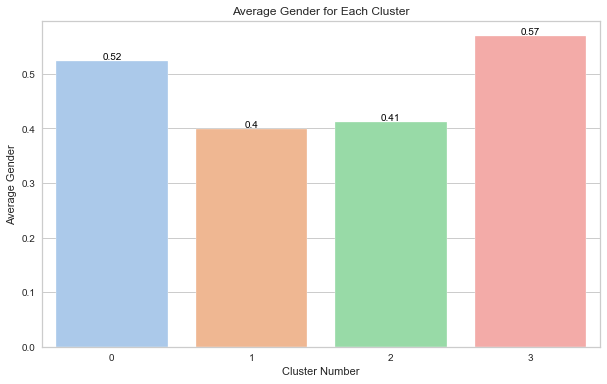

In [36]:
# Encoding Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Grouping by Cluster Number and calculating the mean of Gender
Gender = df.groupby('cluster_num')['Gender'].mean()

# Converting the result to a DataFrame and resetting the index
Gender = Gender.to_frame().reset_index()
print(Gender)

# Plotting the bar plot of average Visit Frequency for each Cluster
plt.figure(figsize=(10,6))
sns.barplot(x='cluster_num', y='Gender',palette = 'pastel', data=Gender)
plt.title("Average Gender for Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Average Gender")

# Adding the value over each bar
for i, v in enumerate(Gender['Gender'].iteritems()):
    plt.text(i, v[1], str(round(v[1], 2)), color='black', ha='center', va='bottom')

plt.show()

In [37]:
# Merging Gender, Like and Visit Frequency DataFrames
segment = pd.merge(Gender, like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Renaming columns for better readability
segment.rename(columns={'Gender_x': 'Gender', 'Like': 'AvgLike', 'VisitFrequency': 'AvgVisitFrequency'}, inplace=True)

# Displaying the final Segmentation result
print("Segmentation Results")
display(segment)

Segmentation Results


,cluster_num,Gender,AvgLike,AvgVisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


### Targeting Segments

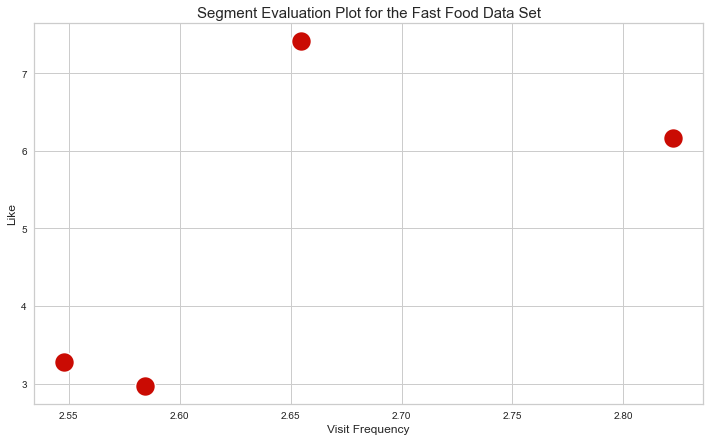

In [38]:
# Setting the size of the scatter plot
plt.figure(figsize = (12,7))

# Plotting the scatter plot
sns.scatterplot(x = "AvgVisitFrequency", y = "AvgLike", data=segment, s=400, color="r")

# Setting the title, x-axis label and y-axis label of the plot
plt.title("Segment Evaluation Plot for the Fast Food Data Set", fontsize = 15) 
plt.xlabel("Visit Frequency", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 

# Displaying the plot
plt.show()